In [100]:
# Exercício 6 da Ficha 3
# Implementação do CLog-MGB, CLog-MGmB e CLog-MGE aos slides 184
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import time


In [122]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def cLogMGmB(x, y, maxIter = 1000, batch=0, eta=0.5, sequential=False):
    N = len(x)
    x = x.T
    linha_de_uns = np.ones((1, x.shape[1]))
    x = np.vstack((linha_de_uns, x))
    #w = np.array([-0.25, -0.25, -0.25])
    #w = np.array([0, 0.5, 1])
    w = np.array([0, 0, 0])
    E = [None]
    W = [w]
    t = 0
    if batch == 0:
        batch = N

    quantBatches = N//batch
    while t < maxIter:
        if not sequential: # sorteio aleatório do batch
            sel = np.random.choice(N, size=batch, replace=False)
        else: # percorre o próximo minibatch da permuta inicial 
            if (t % quantBatches) == 0: # precisa permutar a lista novamente?
                shufSel = np.arange(N)
                np.random.shuffle(shufSel)
                # deixa a lista de indices de um tamanho múltiplo de batch = Descartar últimos elementos que não forma um batch completo
                shufSel = shufSel[:((quantBatches)*batch)]
                shufSel = shufSel.reshape(-1, batch)
            sel = shufSel[(t % quantBatches)]
            
        xs = x[:,sel]
        ys = y[sel]
        #print(quantBatches, sel)
        #print(xs)
        #print(ys)
        pp = sigmoid(np.matmul(w.T, xs))
        d = np.matmul((pp - ys), xs.T) / len(pp)
        w = w - eta * d
        W.append(w)
        t = t + 1

        pp = sigmoid(np.matmul(w.T, x))
        nE = np.sum( -(y * np.log(pp)) - ((1-y) * np.log(1-pp)) )  / N
        E.append(nE)
        #if t > 90:
            #fazPlot(w)
        #print(f"t={t} w({t})={w} E({t})={nE}")

    return (w, E)

In [145]:
def cLogMGmBPredict(x, w):
    x = x.T
    linha_de_uns = np.ones((1, x.shape[1]))
    x = np.vstack((linha_de_uns, x))
    return sigmoid(np.matmul(w.T, x))

def cLogMGmBPredictXY(xx, yy, w):
    x = np.column_stack((xx.ravel(), yy.ravel()))
    return cLogMGmBPredict(x, w)
    
def fazPlot(w, title):
    pp = cLogMGmBPredictXY(xx, yy, w)
    zz = pp.reshape(20, 20)
    # Plotar a região de decisão
    plt.contourf(xx, yy, zz, levels=[-0.1, 0.5, 1.1], colors=['blue', 'red'], alpha=0.3)
    
    # Adicionar contorno da fronteira de decisão
    plt.contour(xx, yy, zz, levels=[0.5], colors='black', linewidths=1)
    
    # Plotar os pontos reais
    plt.scatter(x0[:, 0], x0[:, 1], color='blue', label='y = 0')
    plt.scatter(x1[:, 0], x1[:, 1], color='red', label='y = 1')
    
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Zonas de Classes do {title}')
    plt.legend()
    plt.axis('equal')
    plt.show()

def fazPlotError(E, title):
    # Plota a curva
    plt.plot(E, color='red', label='Erro')
    plt.title(f'Evolução do Erro do {title}')
    plt.xlabel('t')
    plt.ylabel('E')
    plt.grid(False)
    plt.legend()
    plt.show()

def calculaAcc(x, y, w):
    pp = cLogMGmBPredict(x, w)
    return np.sum(np.round(pp) == y) / len(y)
    
    

W* = [ 0.65218174  8.38918742 -1.12324255].T,  E = 0.0070980163857489635, acc = 1.0


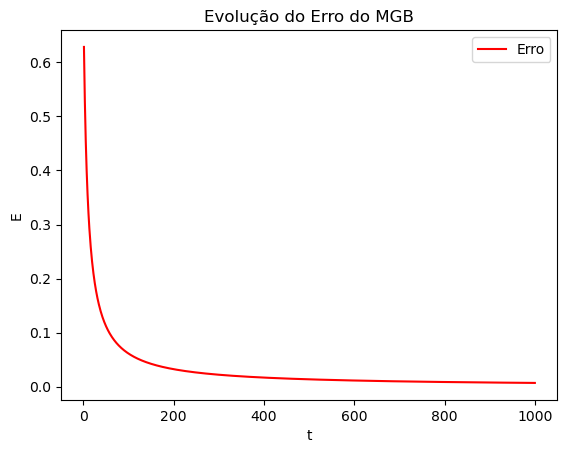

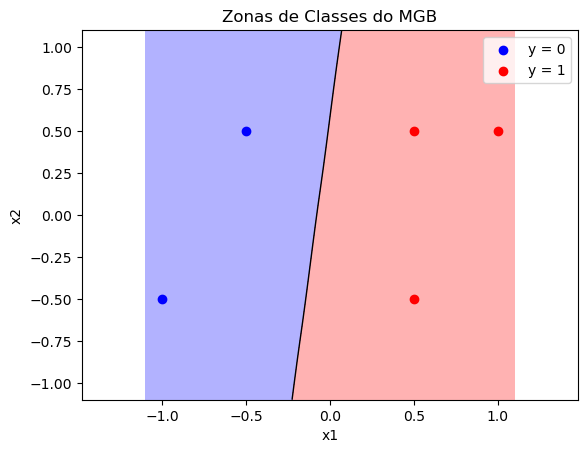

W*=[ 0.79680488  8.41699777 -1.33055744].T,  E = 0.006871144428123118, acc = 1.0


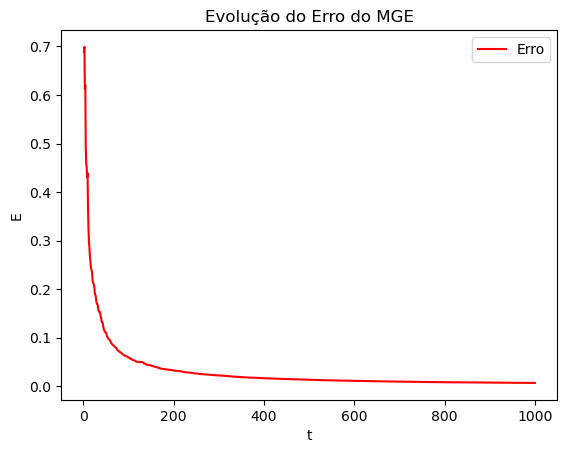

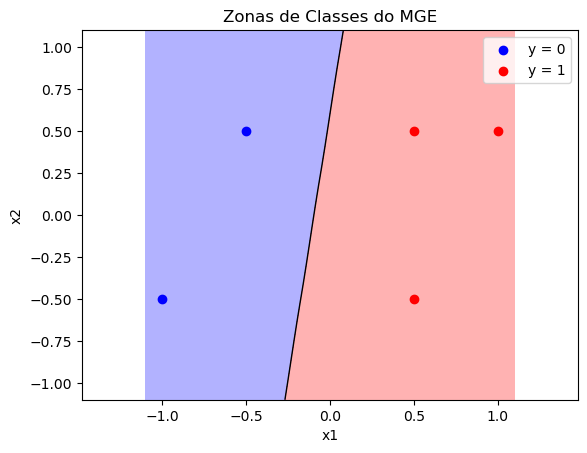

W*=[ 0.65267225  8.41000058 -1.12571841].T,  E = 0.007021400503939235, acc = 1.0


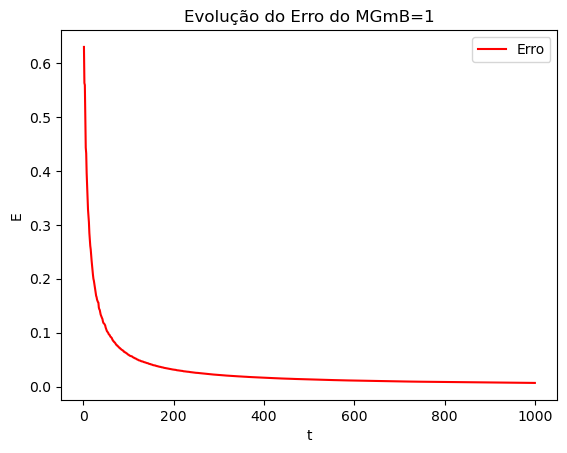

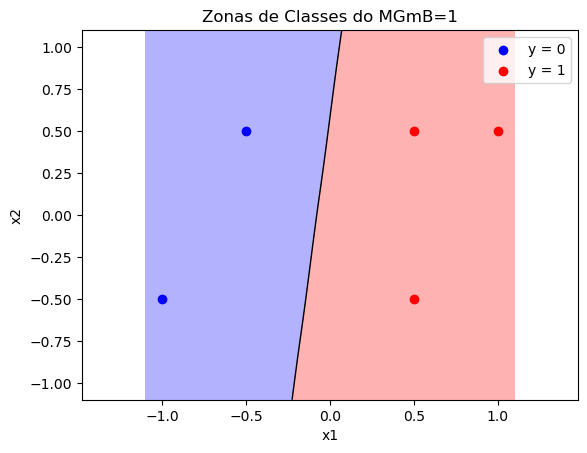

W*=[ 0.63492328  8.34205838 -1.01782859].T,  E = 0.007347686219623177, acc = 1.0


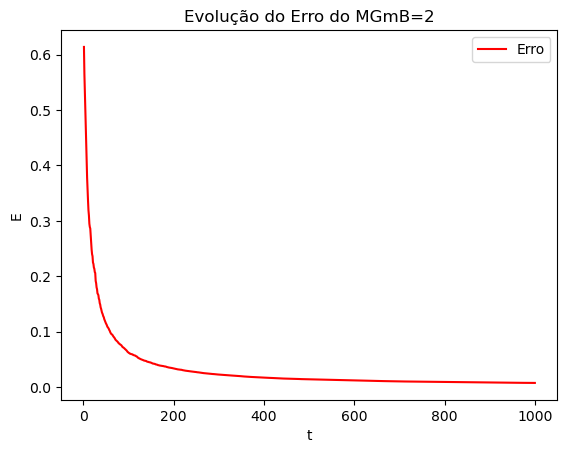

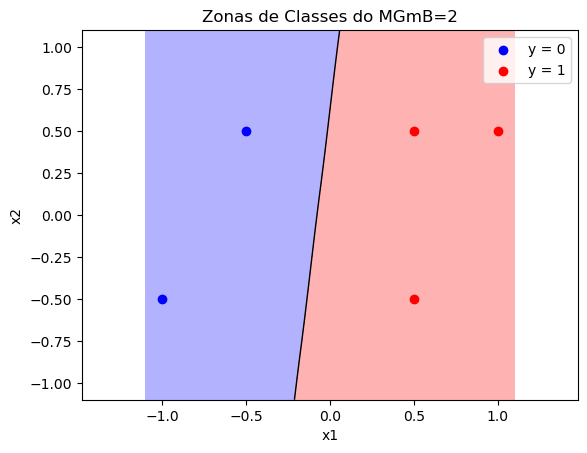

In [149]:
y = np.array([0, 0, 0, 1]) #AND
x = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])
#y = np.array([0, 1, 1, 0]) #XOR
#x = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])
y = np.array([0, 1, 1, 0, 1])
x = np.array([(-0.5, 0.5), (0.5, 0.5), (1., 0.5), (-1., -0.5), (0.5, -0.5)])
x0 = x[y <= 0.5]  # pontos com y=0
x1 = x[y > 0.5]  # pontos com y=1

#xx, yy = np.meshgrid(np.linspace(-0.1, 1.1, 20), np.linspace(-0.1, 1.1, 20))
xx, yy = np.meshgrid(np.linspace(-.1 + np.min(x[:,0]), .1 + np.max(x[:,0]), 20), np.linspace(-.1 + np.min(x[:,0]), .1 + np.max(x[:,0]), 20))

#MGB
w, E = cLogMGmB(x, y, maxIter = 1000)
print(f"W* = {w}.T,  E = {E[-1]}, acc = {calculaAcc(x, y, w)}")
fazPlotError(E, "MGB")
fazPlot(w, "MGB")
#raise SystemExit

#MGE (minibatch = 1)
w, E = cLogMGmB(x, y, batch=1)
print(f"W*={w}.T,  E = {E[-1]}, acc = {calculaAcc(x, y, w)}")
fazPlotError(E, "MGE")
fazPlot(w, "MGE")

#MGBmB sequential de minibatch = 1
w, E = cLogMGmB(x, y, batch=1, sequential=True)
print(f"W*={w}.T,  E = {E[-1]}, acc = {calculaAcc(x, y, w)}")
fazPlotError(E, "MGmB=1")
fazPlot(w, "MGmB=1")

#MGBmB sequential de minibatch = 2
w, E = cLogMGmB(x, y, batch=2)
print(f"W*={w}.T,  E = {E[-1]}, acc = {calculaAcc(x, y, w)}")
fazPlotError(E, "MGmB=2")
fazPlot(w, "MGmB=2")